# TIMIT: NIST format to WAV format

This code could help to convert NIST wav files in TIMIT to the wav format that can be read by scipy

In [2]:
from scipy.io.wavfile import read
import subprocess
import glob
import os

# for duration time distribution plot
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
# current working directory
cwd_path= os.getcwd()

In [6]:
audio_path = os.path.join(cwd_path,'databank')

In [7]:
def readwav(fname):
    """ 
    Read wave file 
    """
    rate, sample = read(fname)
    sample = sample.astype('float32')
    duration = len(sample)/rate # in second
    
    return duration

## NIST to WAV format for TRAIN folder

In [8]:
# Lists all the wav files
wav_files_list = glob.glob('databank/TIMIT/TRAIN/*/*/*.WAV')
print(len(wav_files_list))
wav_files_list[0:5]

4620


['databank/TIMIT/TRAIN/DR3/MVJH0/SX386.WAV',
 'databank/TIMIT/TRAIN/DR3/MVJH0/SI926.WAV',
 'databank/TIMIT/TRAIN/DR3/MVJH0/SX296.WAV',
 'databank/TIMIT/TRAIN/DR3/MVJH0/SX116.WAV',
 'databank/TIMIT/TRAIN/DR3/MVJH0/SX206.WAV']

In [9]:
# Create temporary names for the wav files to be converted. 
# We will rename them back later.
wav_prime = []
for file in wav_files_list:
    fileName, fileExtension = os.path.splitext(file)
    fileName += 'b'
    wav_prime.append(fileName+fileExtension)

In [10]:
# Command strings
cmd = "sox {0} -t wav {1}"
mv_cmd = "mv {0} {1}"

In [19]:
# Convert the wav_files first. Remove it. 
# Rename the new file created by sox to its original name

# Run the following code for one time

for idx, file in enumerate(wav_files_list):
    subprocess.call(cmd.format(file, wav_prime[idx]), shell=True)
    os.remove(file)
    subprocess.call(mv_cmd.format(wav_prime[idx],file), shell=True)


### Testing after converting

Now let us test if we could get acoustic samples from a wavfile

In [11]:
sx368 = 'databank/TIMIT/TRAIN/DR3/MVJH0/SX386.WAV'

In [12]:
rate,signal= read(sx368)
print('rate=',rate)
print('singal:',signal[0:10])

rate= 16000
singal: [ 7  4 -1 -2 -1  7  5  7  8  8]


### Duration time (seconds) distribution of training data set 

In [13]:
dur_time = np.zeros(len(wav_files_list))
for idx, file in enumerate(wav_files_list):
    dur_time[idx]=readwav(file)

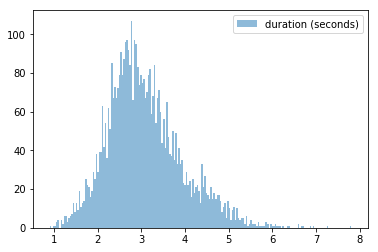

In [49]:
mint = min(dur_time)
maxt = max(dur_time)

bins = np.linspace(mint-0.05, maxt+0.05, 200)
plt.hist(dur_time, bins, alpha=0.5,label='duration (seconds)')
plt.legend(loc='upper right')
plt.show()

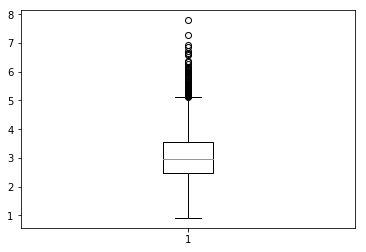

In [54]:
plt.boxplot(dur_time)
plt.show()

## NIST to WAV format for TEST folder

In [55]:
# Lists all the wav files
wav_testfiles_list = glob.glob('databank/TIMIT/TEST/*/*/*.WAV')
print(len(wav_testfiles_list))
wav_testfiles_list[0:5]

1680


['databank/TIMIT/TEST/DR3/MBDG0/SX113.WAV',
 'databank/TIMIT/TEST/DR3/MBDG0/SX23.WAV',
 'databank/TIMIT/TEST/DR3/MBDG0/SI2093.WAV',
 'databank/TIMIT/TEST/DR3/MBDG0/SI1463.WAV',
 'databank/TIMIT/TEST/DR3/MBDG0/SA2.WAV']

In [58]:
# Create temporary names for the wav files to be converted. 
# We will rename them back later.
wav_prime = []
for file in wav_testfiles_list:
    fileName, fileExtension = os.path.splitext(file)
    fileName += 'b'
    wav_prime.append(fileName+fileExtension)

In [59]:
# Convert the wav_files first. Remove it. 
# Rename the new file created by sox to its original name

# Run the following code for one time

for idx, file in enumerate(wav_testfiles_list):
    subprocess.call(cmd.format(file, wav_prime[idx]), shell=True)
    os.remove(file)
    subprocess.call(mv_cmd.format(wav_prime[idx],file), shell=True)

### Testing after converting

In [60]:
sx113 = 'databank/TIMIT/TEST/DR3/MBDG0/SX113.WAV'
rate,signal= read(sx113)
print('rate=',rate)
print('singal:',signal[0:10])

rate= 16000
singal: [ -6  -1  -7 -14 -23 -22 -18  -5   9  19]


### Duration time (seconds) distribution of training data set 

In [61]:
dur_time = np.zeros(len(wav_testfiles_list))
for idx, file in enumerate(wav_testfiles_list):
    dur_time[idx]=readwav(file)

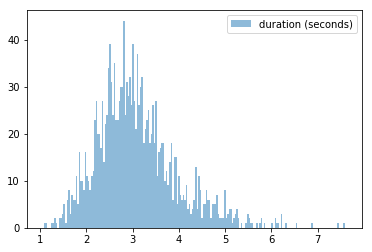

In [62]:
mint = min(dur_time)
maxt = max(dur_time)

bins = np.linspace(mint-0.05, maxt+0.05, 200)
plt.hist(dur_time, bins, alpha=0.5,label='duration (seconds)')
plt.legend(loc='upper right')
plt.show()

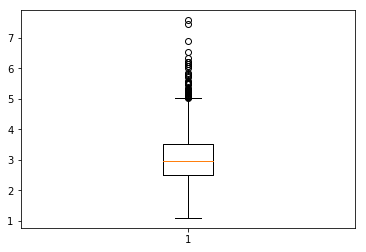

In [63]:
plt.boxplot(dur_time)
plt.show()

## Reference

1. [Coverting NIST to WAV format of TIMIT](https://fieldarchives.wordpress.com/2014/02/18/converting-the-wav-files/)
2. [Verify an audio is in wav format](https://stackoverflow.com/questions/44748258/reading-a-wav-file-from-timit-database-in-python) 

For (2): run '**xxd -b myaudiofile.wav | head**' on terminal, and if the wav file begins with the characters **RIFF** which is the mandatory indicator the file is using wav code, if begin with **NIST**, then the file is in **NIST SPHERE** format.